In [7]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('../../data/split_data/train_features.csv')
train_labels = pd.read_csv('../../data/split_data/train_labels.csv')

train_features.head()

,age,sex,cp,chol,restecg,exang,oldpeak,slope,restingBP,fastingBS,maxHR
0,51,1,0,299,1,1,1.6,2,140,0,173
1,41,1,1,157,1,0,0.0,2,120,0,182
2,65,1,0,177,1,0,0.4,2,120,0,140
3,46,0,0,243,0,1,0.0,1,138,0,152
4,61,1,0,166,0,1,3.6,1,138,0,125


In [8]:
train_labels.head()

,target
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:>

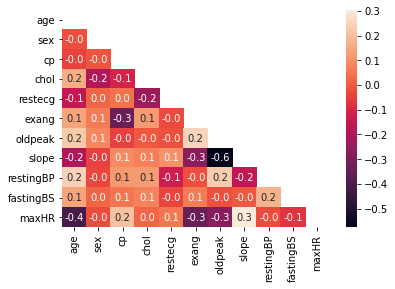

In [9]:
# Check if there are correlation between the features. Ideally, if there features which are highly correlated, we can 
# only using one of them instead of both. 
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', mask=matrix)

In [10]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [11]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 256}

0.735 (+/-0.139) for {'max_depth': 2, 'n_estimators': 8}
0.769 (+/-0.176) for {'max_depth': 2, 'n_estimators': 16}
0.763 (+/-0.087) for {'max_depth': 2, 'n_estimators': 32}
0.78 (+/-0.092) for {'max_depth': 2, 'n_estimators': 64}
0.763 (+/-0.089) for {'max_depth': 2, 'n_estimators': 128}
0.769 (+/-0.107) for {'max_depth': 2, 'n_estimators': 256}
0.774 (+/-0.092) for {'max_depth': 2, 'n_estimators': 512}
0.752 (+/-0.08) for {'max_depth': 4, 'n_estimators': 8}
0.814 (+/-0.102) for {'max_depth': 4, 'n_estimators': 16}
0.786 (+/-0.1) for {'max_depth': 4, 'n_estimators': 32}
0.802 (+/-0.07) for {'max_depth': 4, 'n_estimators': 64}
0.808 (+/-0.097) for {'max_depth': 4, 'n_estimators': 128}
0.808 (+/-0.089) for {'max_depth': 4, 'n_estimators': 256}
0.814 (+/-0.083) for {'max_depth': 4, 'n_estimators': 512}
0.74 (+/-0.093) for {'max_depth': 8, 'n_estimators': 8}
0.803 (+/-0.13) for {'max_depth': 8, 'n_estimators': 16}
0.775 (+/-0.174) for {'m

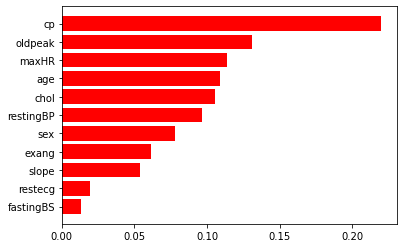

In [12]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### ST slope has to be separated into dummy variables. 0, 1, 2 should be different columns

### See a clear separation power for oldpeak and maxHR as we saw in the EDA_2